# Northwind database analysis

## Executive Summary 

In [72]:
#imports
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import inspect

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt


In [103]:
# create the SQL engine
# to use the large version of the databse:
# engine = create_engine('sqlite:///Northwind_large.sqlite', echo=True)

# to use the small version of the databse:
engine = create_engine('sqlite:///Northwind_small.sqlite', echo=True)


Session = sessionmaker(bind=engine)
session = Session()


In [104]:
# have a look at the tables
inspector = inspect(engine)
print(inspector.get_table_names())


2019-04-01 18:40:54,584 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-01 18:40:54,586 INFO sqlalchemy.engine.base.Engine ()
2019-04-01 18:40:54,588 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-01 18:40:54,590 INFO sqlalchemy.engine.base.Engine ()
2019-04-01 18:40:54,592 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-01 18:40:54,594 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [105]:
def get_columns_info(col_name):
    cols_list = inspector.get_columns(col_name)
    
    print("Table Name: {}".format(col_name))
    print("")
    
    for column in cols_list:
        print("Name: {} \t Type: {}".format(column['name'], column['type']))

get_columns_info('OrderDetail')




2019-04-01 18:40:54,892 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("OrderDetail")
2019-04-01 18:40:54,893 INFO sqlalchemy.engine.base.Engine ()
Table Name: OrderDetail

Name: Id 	 Type: VARCHAR(8000)
Name: OrderId 	 Type: INTEGER
Name: ProductId 	 Type: INTEGER
Name: UnitPrice 	 Type: DECIMAL
Name: Quantity 	 Type: INTEGER
Name: Discount 	 Type: FLOAT


In [106]:
def get_columns_info(col_name):
    cols_list = inspector.get_columns(col_name)
    print(cols_list)
#     print("Table Name: {}".format(col_name))
#     print("")
    
#     for column in cols_list:
#         print("Name: {} \t Type: {}".format(column['name'], column['type']))

get_columns_info('OrderDetail')

[{'name': 'Id', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'OrderId', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'ProductId', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'UnitPrice', 'type': DECIMAL(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'Quantity', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'Discount', 'type': FLOAT(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


In [107]:
con = engine.connect()
rs = con.execute('SELECT * FROM Customer LIMIT 5')

print(rs.fetchall())



2019-04-01 18:40:55,362 INFO sqlalchemy.engine.base.Engine SELECT * FROM Customer LIMIT 5
2019-04-01 18:40:55,365 INFO sqlalchemy.engine.base.Engine ()
[('ALFKI', 'Alfreds Futterkiste', 'Maria Anders', 'Sales Representative', 'Obere Str. 57', 'Berlin', 'Western Europe', '12209', 'Germany', '030-0074321', '030-0076545'), ('ANATR', 'Ana Trujillo Emparedados y helados', 'Ana Trujillo', 'Owner', 'Avda. de la Constitución 2222', 'México D.F.', 'Central America', '05021', 'Mexico', '(5) 555-4729', '(5) 555-3745'), ('ANTON', 'Antonio Moreno Taquería', 'Antonio Moreno', 'Owner', 'Mataderos  2312', 'México D.F.', 'Central America', '05023', 'Mexico', '(5) 555-3932', None), ('AROUT', 'Around the Horn', 'Thomas Hardy', 'Sales Representative', '120 Hanover Sq.', 'London', 'British Isles', 'WA1 1DP', 'UK', '(171) 555-7788', '(171) 555-6750'), ('BERGS', 'Berglunds snabbköp', 'Christina Berglund', 'Order Administrator', 'Berguvsvägen  8', 'Luleå', 'Northern Europe', 'S-958 22', 'Sweden', '0921-12 34 

In [108]:
rs = con.execute('SELECT firstname, lastname, title FROM Employee')
df = pd.DataFrame(rs.fetchall())

df.head()



2019-04-01 18:40:55,639 INFO sqlalchemy.engine.base.Engine SELECT firstname, lastname, title FROM Employee
2019-04-01 18:40:55,642 INFO sqlalchemy.engine.base.Engine ()


,0,1,2
0,Nancy,Davolio,Sales Representative
1,Andrew,Fuller,"Vice President, Sales"
2,Janet,Leverling,Sales Representative
3,Margaret,Peacock,Sales Representative
4,Steven,Buchanan,Sales Manager


In [109]:
# small sample of orders for testing
# rs = con.execute('SELECT * FROM OrderDetail LIMIT 25')

# get full orderdetail
rs = con.execute('SELECT * FROM OrderDetail')


order_temp = pd.DataFrame(rs.fetchall())

2019-04-01 18:40:55,896 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail
2019-04-01 18:40:55,898 INFO sqlalchemy.engine.base.Engine ()


In [110]:
order_temp.head()

,0,1,2,3,4,5
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [111]:
def make_column_list(table):
    cols = []  #make an empty list
    cols_dict = inspector.get_columns(table)  # make a dict of the column names in the SQL table
#     print(cols_list)
    for column in cols_dict:
        cols.append(column['name'])
#     print(cols)
    return cols


In [112]:
column_names = make_column_list('OrderDetail')
order_temp.columns = column_names

In [113]:
order_temp.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


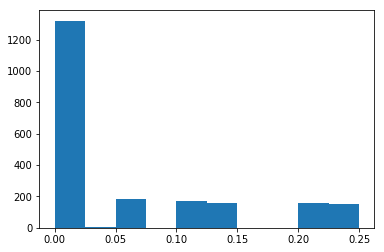

In [114]:
plt.hist(order_temp["Discount"])
plt.show()

Idea - Make a pandas dataframe of all orders where there is any item with a discount. 
Within those orders, what are the summary statistics for:
* The number of different SKU's in the order 
* Quantity of each SKU ordered. How does this compare to orders where the samei SKU has been ordered but there was no discount.
* 

And then compare those statistics to orders where there was no item with a discount.








